# T019 · The *One-Hot Encoding* concept

Developed in the CADD seminar 2020, Volkamer Lab, Charité/FU Berlin 

Authors : 
- Sakshi Misra, CADD seminar 2020, Charité/FU Berlin
- Talia B. Kimber, [Volkamer lab](https://volkamerlab.org), Charité
- Andrea Volkamer, [Volkamer lab](https://volkamerlab.org), Charité

## Aim of this talktorial

The aim of the talktorial is to perform one-hot encoding of SMILES structures on a subset of the ChEMBL dataset to gain a deeper understanding on the one-hot encoding concept and why it is useful as a pre-processing step in various machine learning algorithms. 

<img src="./images/logo.png" width="300" align='center'>

### Contents in *Theory*

- Introduction to SMILES and some of its specification rules
- Understanding categorical data and its conversion to numeric data for usage in machine learning models 
- Explanation of one-hot encoding concept and its advantages and disadvantages
- Integer encoding and the differences between integer encoding and one-hot encoding

### Contents in *Practical*

- Import necessary packages and visualize the dataframe
- Apply one-hot encoding using own implementation
  - Visualization of one-hot encoded matrix (unequal dimension)
- Function defined to pre-process the data and then apply one-hot encoding using own implementation on preprocessed data
  - Visualization of one-hot encoded matrix (equal dimension)
- Apply one-hot encoding using implementation in [Scikit-learn](https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
   - Without padding and visualization of the matrix (unequal dimension)
   - Padding after one-hot encoding is performed and visualization of the matrix (equal dimension)
   - Padding before one-hot encoding performed and visualization of the matrix (equal dimension)
- Apply one-hot encoding using implementation in [keras](https://keras.io/)
  - Without padding and visualization of the matrix (unequal dimension)
  - With padding and visualization of the matrix (equal dimension)

## References

- Theoretical background:
     - ChEMBL database : Bento, A. Patrícia, et al. "The ChEMBL bioactivity database: an update." _Nucleic acids research_ 42.D1 (2014): D1083-D1090. https://doi.org/10.1093/nar/gkt1031.
     - Blogpost : Jason Brownlee, _How to One Hot Encode Sequence Data in Python_, Machine Learning Mastery, Available from https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/, accessed November 9th, 2020.
     

- Packages used:
     - [**rdkit**](https://www.rdkit.org/docs/GettingStartedInPython.html) : Greg Landrum,  _RDKit Documentation_, [PDF](https://buildmedia.readthedocs.org/media/pdf/rdkit/latest/rdkit.pdf), Release on 2019.09.1.
     - [**Scikit-learn**](https://scikit-learn.org/stable/) : Jiangang Hao, et al. "A Review of Scikit-learn Package in Python Programming Language." _Journal of Education and Behavioral Statistics_ Volume: 44 issue: 3 (2019), page(s): 348-361. https://doi.org/10.3102/1076998619832248.
     - [**keras**](https://keras.io/) : Book chapter: "An Introduction to Deep Learning and Keras" in *Learn Keras for Deep Neural Networks* (2019), page(s):1-16, https://doi.org/10.1007/978-1-4842-4240-7.
     - [**Matplotlib**](https://matplotlib.org/)
     - [**timeit**](https://docs.python.org/3/library/timeit.html)
     

- `SMILES encoder` function: Blogpost by iwatobipen, *encode and decode SMILES strings* , Wordpress, Available from https://iwatobipen.wordpress.com/2017/01/22/encode-and-decode-smiles-strings/, accessed January 1st, 2017.

## Theory

### ChEMBL database

- [ChEMBL](https://www.ebi.ac.uk/chembl/) is an open large-scale bioactivity database. 
- It is a database having molecules with drug-like properties. 
- Recent release 17 contains information extracted from  more than 51,000 publications, together with bioactivity   data sets from 18 other sources (depositors and databases). In total, there are now more than 1.3 million distinct compound structures and 12 million bioactivity data points.
- It is maintained by [European Bioinformatics Institute](https://en.wikipedia.org/wiki/European_Bioinformatics_Institute).


### SMILES structures
- [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) (Simplified Molecular Input Line Entry System) notation is a chemical notation that allows a user to represent a chemical structure of a molecule in a linear way that can be used by the computer ( see "Modern Aspects of the Smiles Rearrangement" (2017), [_Chemistry A European Journal_, <b>Volume23, Issue38</b>, 8992-9008](https://doi.org/10.1002/chem.201700353) for further information. )
- It contains a chain of letters, number and characters that specify the atoms, their connectivity , their bond order and chirality.

#### Some SMILES specification rules
- **Atoms** - are represented by their atomic symbols. Also metal atoms are represented with symbols in square bracket, for eg. Gold `[Au]`.
- **Bonds** - Single, Double and Triple bonds are represented by symbols `-`, `=` and `#` respectively.Aromatic bonds are represented by `*`. Single bonds are the default and therefore need not be entered. Aromatic C,O,S and N atoms are shown in lower case like 'c', 'o', 's' and 'n' or by symbo ':' whereas Aliphatic C,O,S and N atoms are shown in upper case. For example, 'CC' would mean that there is a non-aromatic carbon attached to another non-aromatic carbon by a single bond, and the computer would identify the structure as the chemical Ethane (`CH3CH3`).
- **Rings** - SMILES allows a user to identify ring structures by using numbers to identify the opening and closing ring atom. For example, in `C1CCCCC1`, the first carbon has a number '1' which connects by a single bond with the last carbon which also has a number '1'. The resulting structure is cyclohexane
- **Branches** - are specified by enclosing them in parentheses, and can be nested or arranged. For Eg. 2-Propanol is represented by CC(O)C.

### What is Categorical Data?
Categorical data are variables that contain label values rather than numeric values.
Some examples include:

- A “pet” variable with the values: “dog” and “cat“.
- A “color” variable with the values: “red“, “green” and “blue“.
- A “place” variable with the values: “first”, “second” and “third“.

Talking about in terms of bioinformatics, if we are using machine learning classifier to classify cancerous and normal tissues cells, we can have label values say "Lung Cancer", "Breast Cancer", "Liver Cancer" and "Healthy Controls".
We first need to one-hot encode these categorical label values and then we can apply binary or multi-class classifier to achieve classification results.


#### What is the problem with categorical data?
Machine Learning is, after all, a bunch of mathematical operations translated to a computer via low-level programming languages.Computers are brilliant when dealing with numbers. So, we must somehow convert our input data to numbers. 
There are many machine learning algorithms which cannot operate on categorical data directly so they must be converted to a numerical form so all our input variables and output variables will be numeric. (see [**Blogpost**](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/): Alakh Sethi, _One-Hot Encoding vs. Label Encoding using Scikit-Learn_, Analytics Vidya, [accessed March 6th, 2020](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/). for further information)

<div style="text-align: center;">
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/external-content.duckduckgo.com_.jpeg" alt="Drawing" style="max-width: 500px; width:400%;"/>
</div>

**Figure 1** displays the categorical encoding requires for our computers to understand the input.

#### How to convert categorical data to numerical data?
There are many ways to convert categorical values into numerical values.Each approach has its own positive and negative impact on the feature set. Hereby, I would be focusing on 2 main methods: `One-Hot-Encoding` and `Label-Encoder`.
Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.

### The *One-Hot Encoding* concept
The one-hot encoding is a vector representation where all the elements of the vector are 0 except one, which has 1 as its value. For example, [0 0 0 1 0 0] is a one-hot vector.
Simply, one-hot encoding also known as binary encoding, is a binary representation of categorical variables as binary vectors. 

Figures shown below helps us to gain an overall idea of one-hot encoding concept, see [<i>BMC Bioinformatics.</i> (2018), <b>19</b>,526](https://doi.org/10.1186/s12859-018-2523-5) for further information.


<div style="text-align: center;">
    <img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs12859-018-2523-5/MediaObjects/12859_2018_2523_Fig1_HTML.png?as=webp" style="max-width: 500px; width:400%;" />
</div>



**Figure 2a** shows the one-hot encoding of four DNA nucleotides, a filter kernel with one-dimensional CNN, and 

**Figure 2b** shows the one-hot encoding of toluene and applying one-dimensional CNN to SMILES linear representations of chemical compound toluene.
 

Lets take a deeper look into the concept with the help of a simple example that will describe the basic concept of one-hot encoding, why it is useful and how one can approach towards it.

#### Why use a one-hot encoding?
A one-hot encoding allows the representation of categorical data to be more expressive.
Its difficult for many machine learning algorithms to work with categorical data directly that's why the label values which are categorical must be converted into numbers first as a preprocessing step. This is required for both input and output variables that are categorical.
We could use an integer encoding directly. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.
There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship might be damaging to learning to solve the problem. An example might be the labels ‘dog’ and ‘cat


#### Example of one-hot encoding
Lets take a look at a very simple example to understand this concept.
Lets assume we have the “color” variable which has three labels, `RED` , `BLUE` and `GREEN`.
All these labels must be converted into numeric form in order to work with our machine learning algorithm, this can be done by creating three new columns having all the three labels and use “1” value for the color and “0” values for the other colors as shown in Figure 3. (see an article: "*Building a One Hot Encoding Layer with TensorFlow*", George Novack
,[towardsdatascience](https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39) for more detail )


<div style="text-align: center;">
    <img src="images/OneHotEncoding_eg.png" style="max-width: 700px; width:150%;" />
</div>

**Figure 3** shows the visual demonstration of one-hot encoding done on variable "color". 

####  Advantages of using one-hot encoding 
-  If the cardinality (the number of categories) of the categorical features is low (relative to the amount of data) one-hot encoding will work best. We can use it as input into any machine learning model.
-  We can create binary representation of our label values which can be useful for binary classification.


####  Disadvantages of using one-hot encoding 
-  Increase in dimensionality, after adding several columns based on categorical variables, the dataset will be having more dimensions than before and in result it can increase the computational cost.
- There is a high chances of multicollinearity due to dummy variables which can affect the performance of our model.
-  Increase [Sparsity](https://en.wikipedia.org/wiki/Sparse_matrix) (sparse array is a matrix in which most of the elements are zero, one-hot encoding can result in increasing the sparsity of our dataset)

### Other similar transformation: Integer encoding (label encoder)

This is called a label encoding or an integer encoding and is easily reversible.
[Label Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) is also a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering, so that machines can work with it properly.
Machine learning algorithms can then decide in a better way on how labels must be operated. 
It is an important preprocessing step for the structured dataset in supervised learning.

#### Example of integer encoding
Lets take a similar example as above, we have a color variable and we can assign “red” as 0, “green” as 1, and “blue” as 2 as shown in Figure 4, (see an article: "*Know about Categorical Encoding, even New Ones!*", Ahmed Othmen, [towardsdatascience](https://towardsdatascience.com/know-about-categorical-encoding-even-new-ones-c266227b9cbd) for more detail )



![OneHotEncoding Example](images/label_encoding_example.png)

**Figure 4** shows the visual demonstration of label encoding of color variable.

### Difference between label and one-hot encoding

There is not much difference between these two encoding techniques, its mainly depends on the type of data and model we are using. For example if we have categorical features which are not ordinal (dog or cat) then we can use one-hot encoding. Label encoding works best with ordinal data like `Good=0, Better=1, Best=2`.
Also when there are more categorical variables then its good to choose label encoding just to avoid high memory consumption and sparsity.

### Further readings

This section lists some resources for further reading

- [What is one-hot encoding and when is it used in data science?](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science)
- [Categorical encoding using Label-Encoding and One-Hot-Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd#:~:text=One%2DHot%20Encoding%20in%20Python&text=OneHotEncoder%20from%20SciKit%20library%20only,apply%20OneHotEncoder%20on%20column%20Bridge_Types_Cat.)
- [Research Article: Convolutional neural network based on SMILES representation of compounds for detecting chemical motif](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2523-5) #TODO
- [How one can use matplotlib.pyplot.imshow() in Python](https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/)

## Practical

### Imports

In [1]:
# Ignore warnings for readibility
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import statements
import pandas as pd
import numpy as np
from pathlib import Path
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from timeit import default_timer as timer

### Load and draw molecules

Using the `Pandas` library, we first load the data and then draw the molecules using the `rdkit.draw` function. Finally we apply different implementations of `one-hot encoding` into the SMILES structures.

Let's load the data and quickly analyze its column values and check if there are any missing values:

In [3]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

df = pd.read_csv('DATA/CHEMBL25_activities_EGFR.csv',
                 lineterminator='\n', index_col=0) # NBVAL_CHECK_OUTPUT

In [4]:
# Check the dimension and missing value of the data 
print("Shape of dataframe : ", df.shape) 
df.info()

# Look at head
df.head(3) # NBVAL_CHECK_OUTPUT

Shape of dataframe :  (3906, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3906 entries, 1777 to 2783
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chembl_id         3906 non-null   object 
 1   IC50              3906 non-null   float64
 2   units             3906 non-null   object 
 3   canonical_smiles  3906 non-null   object 
            3906 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.1+ KB


,chembl_id,IC50,units,canonical_smiles,pIC50\r
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000


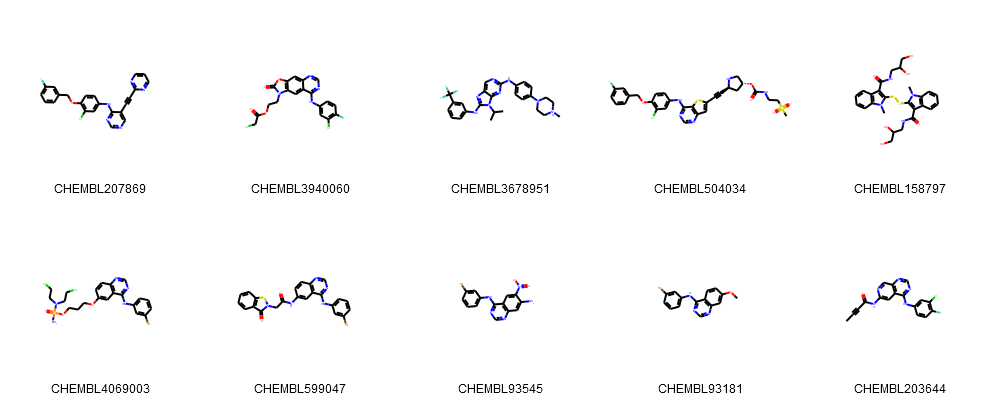

In [5]:
# Using pandas tools and Draw method, we can visualize our molecules
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='canonical_smiles')
Draw.MolsToGridImage(list(df.ROMol[0:10]),
                     legends=list(df.chembl_id[0:20]), molsPerRow=5) # NBVAL_CHECK_OUTPUT

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,

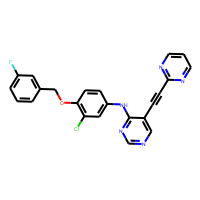
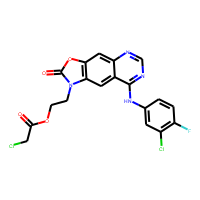

In [6]:
# Renaming column name ROMol to 2D_Figure to get the proper idea of the column
df = df.rename(columns={'ROMol': '2D_Figures'})
df.head(2) # NBVAL_CHECK_OUTPUT

### Apply one-hot encoding using own implementation

Now we can define our own function which will be useful to create the one-hot encoded matrix of our SMILES strings.

In [7]:
# Create dataset of all possible SMILES characters
SMILES_CHARS = [' ', '#', '%', '(',
                ')', '+', '-', '.', '/', '0', '1', '2', '3',
                '4', '5', '6', '7', '8', '9',
                '=', '@', 'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M',
                'N', 'O', 'P', 'R', 'S', 'T', 'V', 'X', 'Z',
                '[', '\\', ']', 'a', 'b', 'c', 'e', 'g', 'i',
                'l', 'n', 'o', 'p', 'r', 's', 't', 'u']

# Convert the dataset into dictionary
smi2index = dict((char, index)for index, char in enumerate(SMILES_CHARS))

In [8]:
# Function defined to create one-hot encoded matrix
def smiles_encoder(SMILES):
    """
    Function defined to one-hot encode SMILES strings
    using all possible 56 characters defined.
       
    Parameters
    ----------
    smiles : str 
          SMILES string
          
    Returns
    -------
    smilesMatrix: ndarray
          one-hot encoded matrix of shape(defined SMILES_CHARS, length of individual SMILES)
    """
    length = len(SMILES)
    smilesMatrix = np.zeros((len(SMILES_CHARS), length), dtype=int)
    for index, char in enumerate(SMILES, 0):
        smilesMatrix[smi2index[char], index] = 1
    return smilesMatrix

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."

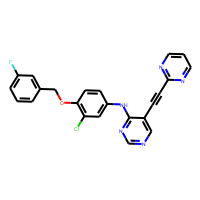
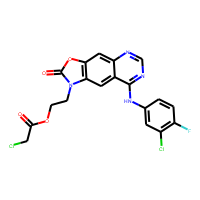
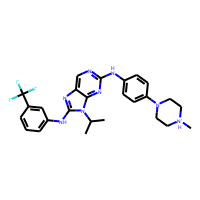

In [9]:
# Apply the function over the canonical SMILES strings
start = timer()
df['Own_OneHotEncoding'] = df['canonical_smiles'].apply(smiles_encoder)
end = timer()
df.head(3) # NBVAL_CHECK_OUTPUT

In [10]:
# Print time required for the function to execute
smiles_encoder_Time = end - start
print(f"{(smiles_encoder_Time):.2f} secs") # NBVAL_CHECK_OUTPUT

0.09 secs


#### Visualization with Matplotlib.imshow() function
`Matplotlib` is a plotting library for the python programming language and `Pyplot` is a state-based interface to a matplotlib module which provides a MATLAB-like interface.
The [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) function in pyplot module of matplotlib library is used to display data as an image i.e. on a 2D space.

Now we can visualize our one-hot encoded matrix using imshow() implementation by defining own `ohe_plot` function as shown below.

In [58]:
def ohe_plot(ohe_matrix, smiles_char):
    """
    Function defined to visualize one-hot encoded matrix 
    using matplotlib imshow() function.
    
    Parameters
    ----------
    ohe_matrix : ndarray
       one-hot encoded matrix of shape(defined SMILES_CHARS, length individual SMILES)
       
    Returns
    ------
    None
       
    """
    im = plt.imshow(ohe_matrix, cmap='hot', interpolation='None')
    plt.colorbar(im, orientation='horizontal')
    plt.xlabel('Length of SMILE string')
    plt.ylabel(f'Char in SMILES ({len(smiles_char)})')
    plt.title('Visualization of one-hot encoded matrix')
    # plt.axis('auto')
    plt.show() 
    print('Shape of one-hot matrix : ' , ohe_matrix.shape)
    return None

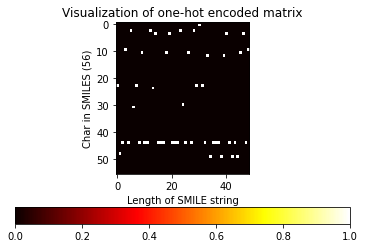

Shape of one-hot matrix :  (56, 49)


In [59]:
ohe_plot(df.iloc[0]['Own_OneHotEncoding'], SMILES_CHARS)# NBVAL_CHECK_OUTPUT

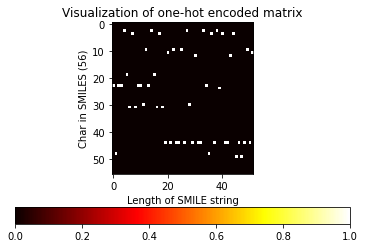

Shape of one-hot matrix :  (56, 52)


In [13]:
ohe_plot(df.iloc[1]['Own_OneHotEncoding'], SMILES_CHARS)# NBVAL_CHECK_OUTPUT

- As we notice from the visualizations above, SMILES strings could have unequal dimension since their string length might differ. For machine learning application, having equal dimension throughout the data set is required. In order to achieve this, we first search for the string with the maximum length using the [len()](https://www.geeksforgeeks.org/python-string-length-len/) method.
- By implementing the above method, we can get the maximum length of the SMILES strings and pass it as an argument in our function for all the strings.


- Second, in the above function, we have created a dataset of 56 possible SMILES characters, but to optimize our one hot encoding, we reconsidered using all the 56 characters.
- We can assume that all the characters won't be present in our SMILES structures, so we looked for all the unique characters present in the SMILES.


- Third, many elements in the periodic table have two characters in their name. For example 'Cl' stands for chloride. This double-character phenomenon is commonly present in our SMILES structure but if we use the above `smiles_encoder` function then we will be splitting 'Cl' into two characters 'C' and 'l' and that would lead to discrepancies, so searching this way for each unique characters and encoding them may not be the best possible way.
- Hence, we search for all the two alphabetic element in our SMILES by comparing the atoms present in our strings with all the possible elements present in the periodic table and replaced all the two alphabetic elements with one character, for example 'Cl' changed to 'L'.

### Function defined to pre-process the SMILES data

In [14]:
# Create function used to preprocessed the data
def Preprocessing_Data(df):
    """
    Function define to preprocess the SMILES structures.
    
    Parameters
    ----------
    df : pandas.DataFrame
       dataframe which requires preprocessing
         
    Returns 
    -------
    df : pandas.DataFrame
        dataframe with new processed_canonical_smiles column
    unique_char : list 
        list with unique characters present in SMILES
    max_length : int
        maximum length of strings of canonical_smiles column
    """
    
# Calculate max length of the SMILES strings
    max_len = df["canonical_smiles"].str.len().max()
    
# Search for unique characters in our SMILES strings
    unique_char = set(df.canonical_smiles.apply(list).sum())
    upper_chars = ['C', 'O', 'F', 'P', 'N', 'S', 'H', 'B', 'I']
    lower_chars = ['l', 'o', 'r', 'n', 'e', 'c', 's']
    
# List of all possible periodic elements
    Periodic_Elements = ['Ac',
                         'Al', 'Am', 'Sb', 'Ar', 'As', 'At', 'Ba',
                         'Bk', 'Be', 'Bi', 'Bh', 'B', 'Br', 'Cd', 'Ca',
                         'Cf', 'C', 'Ce', 'Cs', 'Cl', 'Cr', 'Co', 'Cn',
                         'Cu', 'Cm', 'Ds', 'Db', 'Dy', 'Es', 'Er', 'Eu',
                         'Fm', 'Fl', 'F', 'Fr', 'Gd', 'Ga', 'Ge', 'Au',
                         'Hf', 'Hs', 'He', 'Ho', 'H', 'In', 'I', 'Ir',
                         'Fe', 'Kr', 'La', 'Lr', 'Pb', 'Li', 'Lv',
                         'Lu', 'Mg', 'Mn', 'Mt', 'Md', 'Hg', 'Mo',
                         'Mc', 'Nd', 'Ne', 'Np', 'Ni', 'Nh', 'Nb',
                         'N', 'No', 'Og', 'Os', 'O', 'Pd', 'P',
                         'Pt', 'Pu', 'Po', 'K', 'Pr', 'Pm', 'Pa',
                         'Ra', 'Rn', 'Re', 'Rh', 'Rg', 'Rb', 'Ru', 'Rf',
                         'Sm', 'Sc', 'Sg', 'Se', 'Si', 'Ag', 'Na',
                         'Sr', 'S', 'Ta', 'Tc', 'Te', 'Ts', 'Tb', 'Tl', 'Th',
                         'Tm', 'Sn',
                         'Ti', 'W', 'U', 'V', 'Xe', 'Yb', 'Y', 'Zn', 'Zr']
    
# 'TwoCharcElements' is a list that contains 2 letter elements
# which are valid when compared with all the possible periodic elements.
    TwoCharcElements = []
    for upper in upper_chars:
        for lower in lower_chars:
            ch = upper + lower
            if(ch in Periodic_Elements):
                TwoCharcElements.append(ch)
                
# 'TwoCharElementsSmiles' is a set that contains all the possible 2 letter elem
# in our SMILES strings, that is specific to our dataset.
    TwoCharElementsSmiles = set()
    for char in TwoCharcElements:
        for index in range(len(df)):
            if(df['canonical_smiles'].iloc[index].find(char) != -1):
                TwoCharElementsSmiles.add(char)
# Create a new column having processed canonical SMILES
    df['Processed_canonical_smiles'] = ""
    
# Replaced all the two letter elements found (Cl, Br, Cn, Se, @@) with one char
    for index in range(len(df)):
        element = df['canonical_smiles'].iloc[index]
        element = element.replace("Cl", "L")
        element = element.replace("Br", "R")
        element = element.replace("Cn", "X")
        element = element.replace("Se", "Z")
        element = element.replace("@@", "$")
        df['Processed_canonical_smiles'].iloc[index] = element
    unique_char = set(df.Processed_canonical_smiles.apply(list).sum())
    return unique_char, df, max_len

**Note:** This function is highly specific to the above dataset used, because we have replaced 2 letter elements that are particularly found in the used dataset. One can add more 2 letter elements present in their specific SMILES.

### Apply one-hot encoding using own implementation on preprocessed data

Now we have used the same function 'smiles_encoder' but on processed canonical strings.


In [15]:
# Calling function
unique_char, df, max_len = Preprocessing_Data(df)

In [16]:
# Create dictionary of the unique char datset
smi2index = dict((char, index) for index, char in enumerate(unique_char))


# Function defined to create one-hot encoded matrix
def smiles_encoder(smiles, maxlen):
    """
    Function defined using all unique characters in our
    processed canonical pmiles structures created
    from preprocessed function.
       
    Parameters
    ----------
    smiles : str
         smile data in string
    maxlen : int
         max length of the SMILES string
        
    Returns
    -------
    smilesMatrix : ndarray  
         one-hot encoded matrix of fixed shape(unique char in smiles, max smile_length) 
    """
    smilesMatrix = np.zeros((len(unique_char), maxlen))
    for index, char in enumerate(smiles, 0):
        smilesMatrix[smi2index[char], index] = 1
    return smilesMatrix

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,Processed_canonical_smiles,UniqueChar_OneHotEncoding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."

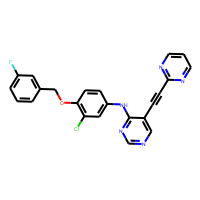
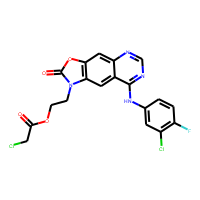
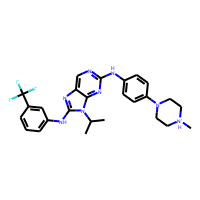

In [17]:
# Apply the function over the SMILES strings
start = timer()
df['UniqueChar_OneHotEncoding'] = df['Processed_canonical_smiles'].apply(smiles_encoder, maxlen = max_len)
end = timer()
df.head(3) # NBVAL_CHECK_OUTPUT

In [18]:
# Print time required for the function to execute
smiles_encoder_eqDimen = end - start
print(f'{smiles_encoder_eqDimen:.2f} secs') # NBVAL_CHECK_OUTPUT

0.17 secs


#### Visualization with Matplotlib.imshow() function

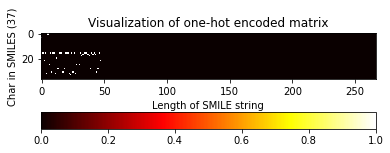

Shape of one-hot matrix :  (37, 267)


In [19]:
ohe_plot(df.iloc[0]['UniqueChar_OneHotEncoding'], unique_char)# NBVAL_CHECK_OUTPUT

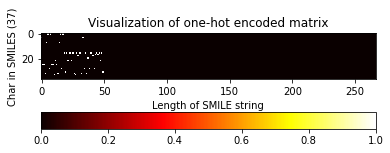

Shape of one-hot matrix :  (37, 267)


In [20]:
ohe_plot(df.iloc[1]['UniqueChar_OneHotEncoding'], unique_char)# NBVAL_CHECK_OUTPUT

From the above visualizations, we can conclude that the dimensions are equal for all the string's one-hot encoded matrix using `Preprocessing_Data` and `smiles_encoder` functions.

### Apply one-hot encoding using implementation in Scikit-learn
Now, we proceed with our second implementation of one-hot encoding from scikit-learn. We can use [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from SciKit library but it only takes numerical categorical values, hence any value of string type should be [label_encoded](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) first before one-hot encoded.

In [21]:
# Split the SMILES into characters
def split(stringData):
    """
    Function used to split the SMILES strings into characters array
    
    Parameters
    ----------
    stringData : str
        SMILE string
         
    Returns
    -------
    list
        list of characters in the string data
    """
    return [char for char in stringData]

In [22]:
# Use Scikit-learn implementation of one-hot encoding
def sklearn_OneHotEncode(smiles, islaterpadding):
    """
    Function defined to label and one-hot encode the SMILES
    using sklearn LabelEncoder and OneHotEncoder implementation
       
    Parameters
    ----------
    smiles : str
        smiles
    islaterpadding : Bool
        ???TODO
          
    Returns
    -------
    onehot_encoded: ndarray
        one-hot encoded matrix of shape(chars in individual SMILES, length of individual SMILES)
    """
    # Integer encoding
    canonical_char = split(smiles)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(canonical_char)
    # one-hot encoding
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    if (islaterpadding == True):
        onehot_encoded = laterPadding(onehot_encoded)
    onehot_encoded = onehot_encoded.transpose()
    return onehot_encoded

Running the functions above first give integer encoded SMILES of the labels and finally one-hot encode the SMILES structures.


By default, the OneHotEncoder class will return a more efficient sparse encoding which can be useful in some applications but in this case, we disabled the sparse return type by setting the `sparse=False` argument.

#### Without padding (unequal dimension)

We can use above defined sklearn_OneHotEncode function to create OneHotEncoded matrix but this will again create unequal dimensions of the matrix because it will first label encode all the characters present in the SMILES strings (individually) and then one-hot encode it.

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,Processed_canonical_smiles,UniqueChar_OneHotEncoding,sklearn_OneHotEncoded_WP
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."

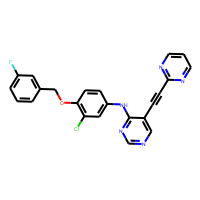
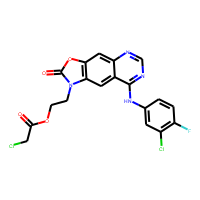

In [23]:
# Apply the function over the Processed_canonical_smiles strings
start = timer()
df['sklearn_OneHotEncoded_WP'] = df['Processed_canonical_smiles'].apply(sklearn_OneHotEncode, islaterpadding=False)
end = timer()
df.head(2)

In [24]:
# Print time required for execution
sklearn_time_withoutPadding = end - start
print(f'{sklearn_time_withoutPadding:.2f} secs') # NBVAL_CHECK_OUTPUT

1.50 secs


##### Visualization with Matplotlib.imshow() function

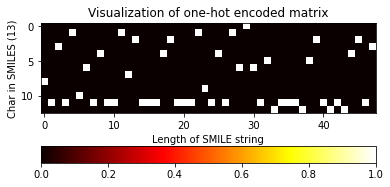

Shape of one-hot matrix :  (13, 48)


In [25]:
ohe_plot(df.iloc[0]['sklearn_OneHotEncoded_WP'], df.iloc[0]['sklearn_OneHotEncoded_WP'])# NBVAL_CHECK_OUTPUT

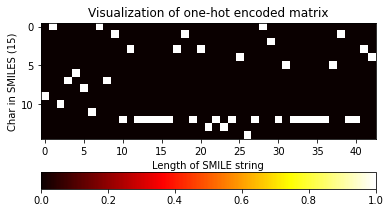

Shape of one-hot matrix :  (15, 43)


In [26]:
ohe_plot(df.iloc[100]['sklearn_OneHotEncoded_WP'], df.iloc[100]['sklearn_OneHotEncoded_WP'])# NBVAL_CHECK_OUTPUT

It can be confirmed from above visualization that the our one-hot encoded matrix from sklearn implementation do not have equal dimensions because sklearn Onehot_encoder takes individual strings as their input.

So we thought of making equal dimension of our one-hot encoded matrix by adding **padding** which simply means adding zeros to it. It can be either done after one-hot encoding is performed on the SMILES strings or before one-hot encoding is performed, after we label encode our SMILES characters.

We will be discussing both the scenarios in next sections.

#### With padding (equal dimension)

##### Padding after one-hot encoding is perfomed

In [27]:
# Defined function to add padding after one-hot encoding
def laterPadding(matrix):
    """
    Function defined to add horizontal and vertical 
    padding to the given matrix.
    
    Parameters
    ----------
    matrix: ndarray
       Character array
          
    Returns
    -------
    matrix: ndarray
       padded one hot encoded matrix of 
       shape(unique char in smiles, max smile_length)
  """
    IndexPadding = np.ndarray(shape=(max_len-len(matrix),
                                     len(matrix[0])))
    IndexPadding.fill(0)
    ColumnPadding = np.ndarray(shape=(max_len,
                                      len(unique_char)-len(matrix[0])))
    ColumnPadding.fill(0)
    matrix = np.append(matrix, IndexPadding, axis=0)
    matrix = np.append(matrix, ColumnPadding, axis=1)
    return matrix

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,Processed_canonical_smiles,UniqueChar_OneHotEncoding,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."

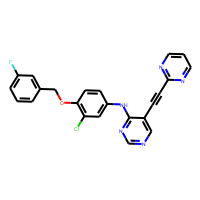
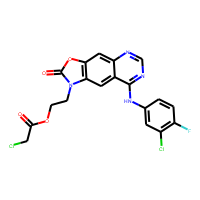

In [28]:
# Apply the function over the Processed_canonical_smiles strings

start = timer()
df['sklearn_OneHotEncoded_later'] = df['Processed_canonical_smiles'].apply(sklearn_OneHotEncode, islaterpadding=True)
end = timer()
df.head(2)

In [29]:
# Print time required for execution
sklearn_time_Later = end - start
print(f'{sklearn_time_Later:.2f} secs') # NBVAL_CHECK_OUTPUT

1.91 secs


###### Visualization with Matplotlib.imshow() function 

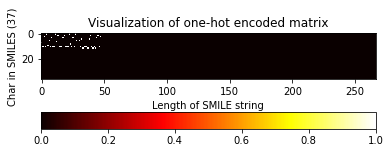

Shape of one-hot matrix :  (37, 267)


In [30]:
ohe_plot(df.iloc[0]['sklearn_OneHotEncoded_later'], unique_char)# NBVAL_CHECK_OUTPUT

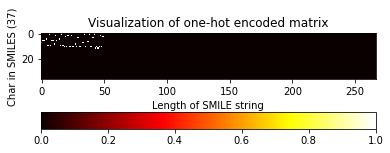

Shape of one-hot matrix :  (37, 267)


In [31]:
ohe_plot(df.iloc[1]['sklearn_OneHotEncoded_later'], unique_char)# NBVAL_CHECK_OUTPUT

Now we can observe that the dimensions are equal for all the SMILES strings.

##### Padding before one-hot encoding is perfomed

In this case we have added padding just after the label encoding or before the one-hot encoding is performed on SMILES.

In [32]:
# Defined function to add padding before one-hot encoding
def initialPadding(canonical_char, max_len):
    """
    Function is defined to add padding to the given list 
    before one-hot encoding is performed.
    
    Parameters
    ----------
    canonical_char : array
       Character array
    max_len : int
       max length of smile string
          
    Returns
    -------
    list1 : list 
       padded character list of smiles
    """
    zeroes = [0] * (max_len-len(canonical_char))
    list1 = canonical_char + zeroes
    return list1

In [33]:
def initial_padding_and_encoding(smiles):
    """
    Function defined to one-hot encode initially padded SMILES strings
    using sklearn_OneHotEncode function. 
    
    Parameters
    ----------
    smiles : str
       SMILES string
         
    Returns
    -------
    ndarray
      one hot encoded with intial padding of shape(unique char in smiles, max smile_length)
    """
    # call 'split' function on smiles
    canonical_char = split(smiles)
    # call 'initialPadding' function on splitted list of characters
    canonical_charPadded = initialPadding(canonical_char, max_len)
    # call 'sklearn_OneHotEncode' function
    sklearnOHC = sklearn_OneHotEncode(canonical_charPadded, False)
    sklearnOHC = sklearnOHC.transpose()
    ColumnPadding = np.ndarray(shape=(max_len,
                                      len(unique_char)-len(sklearnOHC[0])))
    ColumnPadding.fill(0)
    sklearnOHC = np.append(sklearnOHC, ColumnPadding, axis=1)
    return sklearnOHC.transpose()

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,Processed_canonical_smiles,UniqueChar_OneHotEncoding,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later,sklearn_OneHotEncoded_initial,keras_OneHotEncoded,keras_OneHotEncoded_padding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."

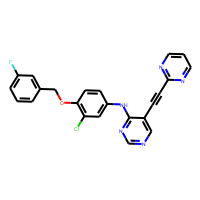
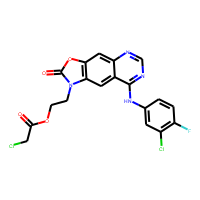

In [49]:
# Apply the function over the Processed_canonical_smiles strings
start = timer()
df['sklearn_OneHotEncoded_initial'] = df['Processed_canonical_smiles'].apply(initial_padding_and_encoding)
end = timer()
df.head(2)

In [50]:
# Print time required for execution
sklearn_time_initial = end - start
print(f'{sklearn_time_initial:.2f} secs') # NBVAL_CHECK_OUTPUT

2.07 secs


###### Visualization with Matplotlib.imshow() function 

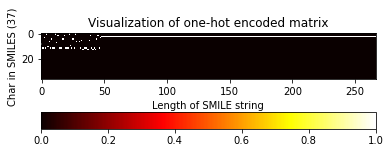

Shape of one-hot matrix :  (37, 267)


In [51]:
ohe_plot(df.iloc[0]['sklearn_OneHotEncoded_initial'], unique_char)# NBVAL_CHECK_OUTPUT

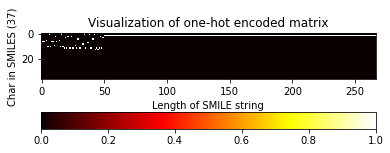

Shape of one-hot matrix :  (37, 267)


In [52]:
ohe_plot(df.iloc[1]['sklearn_OneHotEncoded_initial'], unique_char)# NBVAL_CHECK_OUTPUT

### Apply one-hot encoding using implementation in Keras

Keras is also a very powerful and highly used library mainly for deep-learning tasks. 
There may be a case where we have sequences or strings that are already integer encoded, then in that case we can use function called [to_categorical()](https://keras.io/api/utils/) provide by keras library to one-hot encode integer data directly, but it always should be integer which may not have a real ordinal relationship and are really just placeholders for labels.

In [38]:
# Use keras implementation of one-hot encoding
def keras_OneHotEncode(smiles, islaterpadding):
    """
    Function is defined to one-hot encode the SMILES using keras
    implementation.
    
    Parameters
    ----------
    canonical_char : array
        Canonical character array
    islaterpadding : bool
        ?????
         
    Returns
    -------
    encoded : ndarray
        one-hot encoded matrix of shape(chars in SMILES, length of SMILES)
    """
    # apply 'split' function on smiles string
    canonical_char = split(smiles)
    # integer encoding
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(canonical_char)
    # one-hot encoding
    encoded = to_categorical(integer_encoded)
    if (islaterpadding == True):
        encoded = laterPadding(encoded)
    encoded = encoded.transpose()
    return encoded

#### Without padding (unequal dimension)

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,Processed_canonical_smiles,UniqueChar_OneHotEncoding,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later,sklearn_OneHotEncoded_initial,keras_OneHotEncoded,keras_OneHotEncoded_padding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."

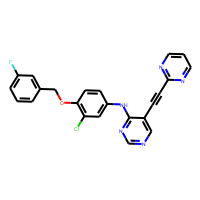
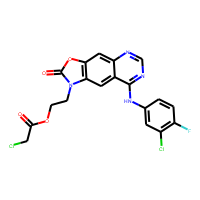

In [53]:
# Apply the function over the Processed_canonical_smiles strings
start = timer()
df['keras_OneHotEncoded'] = df['Processed_canonical_smiles'].apply(keras_OneHotEncode, islaterpadding = False)
end = timer()
df.head(2)

In [54]:
# Print time required for execution
keras_time = end - start
print(f'{keras_time:.2f} secs') # NBVAL_CHECK_OUTPUT

0.29 secs


##### Visualization with Matplotlib.imshow() function 

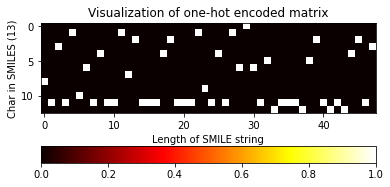

Shape of one-hot matrix :  (13, 48)


In [41]:
ohe_plot(df.iloc[0]['keras_OneHotEncoded'], df.iloc[0]['keras_OneHotEncoded'])# NBVAL_CHECK_OUTPUT

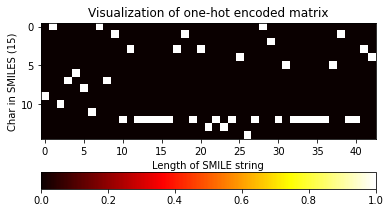

Shape of one-hot matrix :  (15, 43)


In [55]:
ohe_plot(df.iloc[100]['keras_OneHotEncoded'], df.iloc[100]['keras_OneHotEncoded'])# NBVAL_CHECK_OUTPUT

#### With padding (equal dimension)

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,Processed_canonical_smiles,UniqueChar_OneHotEncoding,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later,sklearn_OneHotEncoded_initial,keras_OneHotEncoded,keras_OneHotEncoded_padding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."

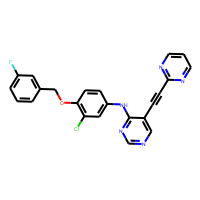
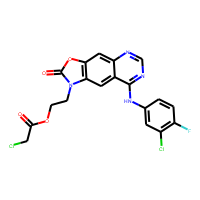

In [43]:
# Apply the function over the Processed_canonical_smiles strings
start = timer()
df['keras_OneHotEncoded_padding'] = df['Processed_canonical_smiles'].apply(keras_OneHotEncode, islaterpadding = True)
end = timer()
df.head(2)

In [44]:
# Print time required for execution
keras_time_WP = end - start
print(f'{keras_time_WP:.2f} secs') # NBVAL_CHECK_OUTPUT

0.55 secs


##### Visualization with Matplotlib.imshow() function

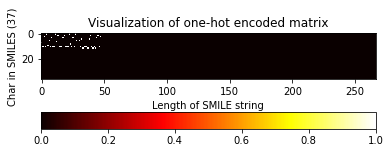

Shape of one-hot matrix :  (37, 267)


In [45]:
ohe_plot(df.iloc[0]['keras_OneHotEncoded_padding'], unique_char)# NBVAL_CHECK_OUTPUT

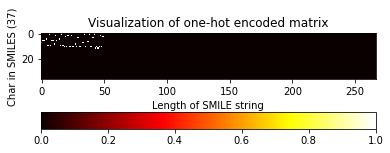

Shape of one-hot matrix :  (37, 267)


In [46]:
ohe_plot(df.iloc[1]['keras_OneHotEncoded_padding'], unique_char)# NBVAL_CHECK_OUTPUT

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,Processed_canonical_smiles,UniqueChar_OneHotEncoding,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later,sklearn_OneHotEncoded_initial,keras_OneHotEncoded,keras_OneHotEncoded_padding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."

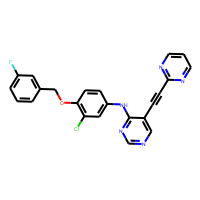
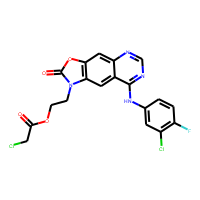
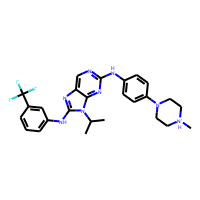

In [47]:
# Final dataframe with all the one-hot encoded matrices
df.head(3) # NBVAL_CHECK_OUTPUT

## Discussion 

As we notice from the simulations above, the execution time varies with different implementations:

- **Unequal dimension** (when no padding was performed)
    - Unexpectedly, our own `smiles_encoder` function works the best with 0.89 sec execution time followed by Keras implementation with 1.48 sec and One Hot Encoding with 'Scikit-learn' implementation executed with 2.42 secs, the highest. But since the dimensions differ, machine learning models cannot be applied.
    
- **Equal dimension** (when padding was performed)
     - Surprisingly, even after creating equal dimensions (adding padding), my own functions `smiles_encoder` along with `PreprocessingData` again outperform the other two implementations with execution time of 1.02 secs whereas sklearn  required approximately 3.0 secs and keras 1.85 secs. In my opinion, it happened because of additional padding performed on the strings.
     
     
I would also like to draw your attention for the time execution difference in Scikit-learn Implementation when Padding performed

- **Before one-hot encoding** : Time required was 3.0 secs approx.
- **After one-hot encoding** : Time required was 2.7 secs approx.

One possible reason of this time difference could be that if we perform padding after the label encoding, then we will be having more characters to one hot encode as compared to just add padding after one encoded is accomplished.

**Note:** Execution Timings might differ depending upon the environment used.

### Challenges 

There were several challenges faced during the task, for instance:

- Making equal dimensions of the one-hot encoded Matrix.

- Replacing two letter elements with unique characters.

- After searching for 2 letter elements, we found a specific element `Sc` which is a metallic element, but in our dataset both 'S' and 'c' elements are present individually as well. So if we would have replaced `Sc` with single letter element then it might have effected our actual strings. So we assumed that since `Sc` is a metallic element and its rarely present in SMILES, so we did not replace this element.

### Quiz

- Why is it required to have equal dimensions of the one-hot encoded matrix ?
- Is there any other way to pre-process the data ?
- How and which machine learning models can be applied on the above dataset ?